Corrección del ejercicio 2.

In [1]:
from pylab import*

In [2]:
import numpy as np
import scipy.stats
import seaborn as sns
from scipy.special import gamma
from scipy.stats import beta
from scipy.stats import spearmanr

In [3]:
import pandas as pd

In [4]:
ruta = "/home/sandra/Documents/Tarea_1_Semninario/Ejercicio_2_3/Ejercicio_Base_data_schools/"

In [5]:
bd = "data_schools.xlsx"

In [6]:
bd_escuelas = pd.read_excel(ruta+bd)
bd_escuelas

,escuela,LSAT,GPA
0,1,622,3.23
1,2,542,2.83
2,3,579,3.24
3,4,653,3.12
4,5,606,3.09
...,...,...,...
77,78,590,3.15
78,79,558,2.81
79,80,611,3.16
80,81,564,3.02


 Medir la precisión de un estimador, de un índíce , de un estadistico que nos interesa. Vamos a medir la precisión utilizando el error estándar. 

Datos de escuelas que se seleccionaron al azar, prueba nacional que se calcula en función a puntajes, y calcularón el promedio de puntajes que se obtuvo al hacer esa prueba. Internamente la escuel. Se QUIERE MEDIR LA CORRELACIÓN ENTRE UN PUNTAJE Y OTRO. 

In [7]:
#Seleccionamos aleatoriamente 15 escuelas
escuelas_random= bd_escuelas.sample(n=15, random_state=9998)[["escuela"]]
escuelas_random

,escuela
37,38
51,52
75,76
5,6
73,74
21,22
57,58
10,11
35,36
39,40


Corrimos 10000 muestras boostrap para estimar el error estándar de  la correlación de la base.

In [8]:
corrs = np.array([])

for i in range(5000):
        #Seleccionamos aleatoriamente 15 escuelas
        escuelas_random= bd_escuelas.sample(n=15)[["escuela"]]

        escuelas_random = pd.merge(escuelas_random , bd_escuelas, how="left", on=["escuela"])

        corr,_= spearmanr(escuelas_random.LSAT, escuelas_random.GPA)
        corrs = np.append(corrs, corr)

A continuación se muestra el histograma de las correlaciones obtenidas de las 10,000 muestras bootstrap

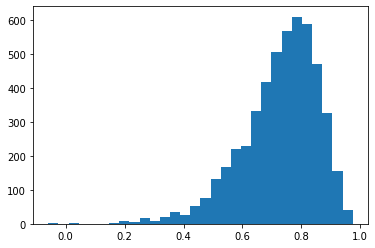

In [9]:
plt.hist(corrs, bins=30)
plt.show()

En el sigueinte código se encontra la N para la cual el error estándar es mejor, es decir el número de muestras bootstrap para el  cuál el error estándar es más chico. Para ella caculamos los errores estandar de las muestras desde 10 hasta 10000, y gráficamos los errores estándar obtenidos.

In [13]:

dist = np.array([])
for j in range(20,1000,20):
  
    corrs = np.array([])

    for i in range(j):
            #Seleccionamos aleatoriamente 15 escuelas
            escuelas_random= bd_escuelas.sample(n=15)[["escuela"]]

            escuelas_random = pd.merge(escuelas_random , bd_escuelas, how="left", on=["escuela"])

            corr,_= spearmanr(escuelas_random.LSAT, escuelas_random.GPA)
            corrs = np.append(corrs, corr)
            
    dist=np.append(dist, np.std(corrs))

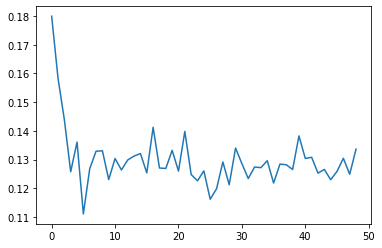

In [14]:
plt.plot(dist)

Podemos obeservar que a pesar de que  la gráfica es ruidosa, esta converge al error estándar obtenido anteriormente, lo cual nos permite confirmar que mientras mayor sea la N ( es decir mientras N tienda a $\infty$ ) la estimación del error estándar converge al valor del error estándar real.
En conclusión, entre mayor sea la N mejor.